In [1]:
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import torchvision

# Define the Generator and Discriminator Newtorks

In [2]:

class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            
            nn.ConvTranspose2d(in_channels=100, 
                               out_channels=512,
                               kernel_size=4,
                               stride=1,
                               padding=0,
                               bias=False),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels=512,
                               out_channels=256,
                               kernel_size=4,
                               stride=2,
                               padding=1,
                               bias=False),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels=256,
                               out_channels=128,
                               kernel_size=4,
                               stride=2,
                               padding=1,
                               bias=False),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels=128,
                               out_channels=64,
                               kernel_size=4,
                               stride=2,
                               padding=1,
                               bias=False),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels=64, 
                               out_channels=1,
                               kernel_size=4,
                               stride=2,
                               padding=1,
                               bias=False),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.main(x)
        return x

In [3]:
class Discriminator(nn.Module):

    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.main = nn.Sequential(
            
            # (batch_size, 1, 64, 64)
            nn.Conv2d(in_channels=1,
                      out_channels=64,
                      kernel_size=4,
                      stride=2,
                      padding=1, 
                      bias=False),
            nn.LeakyReLU(negative_slope=0.2),
            
            # (batch_size, 64, 32, 32)
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=4,
                      stride=2,
                      padding=1,
                      bias=False),
            nn.BatchNorm2d(num_features=128),
            nn.LeakyReLU(negative_slope=0.2),
            
            # (batch_size, 128, 16, 16)
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=4,
                      stride=2,
                      padding=1,
                      bias=False),
            nn.BatchNorm2d(num_features=256),
            nn.LeakyReLU(negative_slope=0.2),
            
            # (batch_size, 256, 8, 8)
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=4,
                      stride=2,
                      padding=1,
                      bias=False),
            nn.BatchNorm2d(num_features=512),
            nn.LeakyReLU(negative_slope=0.2),
            
            # (batch_size, 512, 4, 4)
            nn.Conv2d(in_channels=512,
                      out_channels=1,
                      kernel_size=4,
                      stride=1,
                      padding=0,
                      bias=False),
            
            # (batch_size, 1, 1, 1)
            nn.Sigmoid()
        )
        
        
    def forward(self, x):
        x = self.main(x)
        return x

In [4]:
G = Generator()
G(torch.randn(12, 100, 1, 1)).shape

torch.Size([12, 1, 64, 64])

In [5]:
D = Discriminator()
D(torch.randn(14, 1, 64, 64)).shape

torch.Size([14, 1, 1, 1])

# Prepare Data
### Note: All images are of size 64 x 64

In [6]:
def build_data_loader(batch_size):
    dataset = torchvision.datasets.ImageFolder(
        root='../dataset/chest_xray/train',
        transform=torchvision.transforms.Compose([
            torchvision.transforms.Resize(64), 
            torchvision.transforms.CenterCrop(64), 
            torchvision.transforms.Grayscale(), 
            torchvision.transforms.ToTensor(), 
        ]))
    
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [7]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images):
    img = torchvision.utils.make_grid(images, normalize=True)
    npy_img = img.numpy()
    plt.imshow(np.transpose(npy_img, (1, 2, 0)),
               interpolation='nearest')
    plt.show()

torch.Size([8, 1, 64, 64])


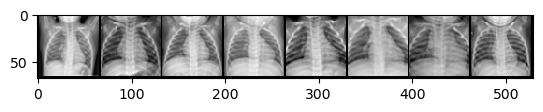

In [8]:
for data, _ in build_data_loader(8):
    test_images = data
    break
    
print(test_images.shape)
show_images(test_images)

# Perform Training

In [9]:
compute_loss = nn.BCELoss()

In [10]:
n_epochs = 100
batch_size = 100

In [12]:
device = torch.device("mps")
G = G.to(device)
D = D.to(device)

In [13]:
# Create an optimizer to update the weights of each network
optimizer_d = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_g = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [16]:
data_loader = build_data_loader(batch_size)
test_noise = torch.randn((8, 100, 1, 1)).to(device=device)

Epoch: 0/100
Example images:


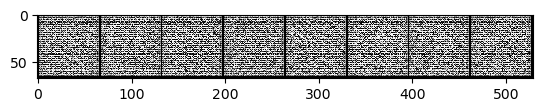

Epoch: 0	Batch: 52/53
Loss G: 7.034494400024414
Loss D: 0.00363063532859087
Epoch: 1/100
Example images:


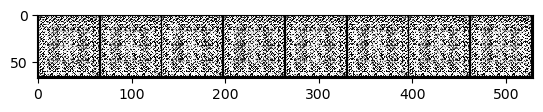

Epoch: 1	Batch: 52/53
Loss G: 7.580166816711426
Loss D: 0.0014092733617872
Epoch: 2/100
Example images:


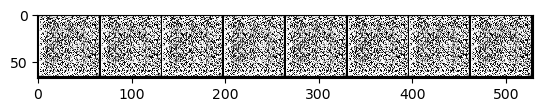

Epoch: 2	Batch: 52/53
Loss G: 7.945314407348633
Loss D: 0.0008140666759572923
Epoch: 3/100
Example images:


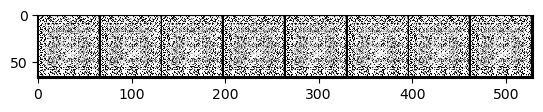

Epoch: 3	Batch: 52/53
Loss G: 9.534371376037598
Loss D: 0.21414975821971893
Epoch: 4/100
Example images:


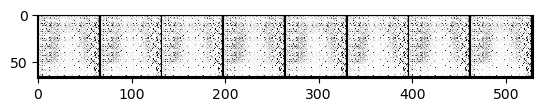

Epoch: 4	Batch: 52/53
Loss G: 9.826862335205078
Loss D: 0.1031813845038414
Epoch: 5/100
Example images:


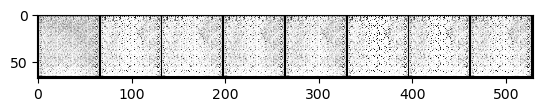

Epoch: 5	Batch: 52/53
Loss G: 0.4384429454803467
Loss D: 1.5279240608215332
Epoch: 6/100
Example images:


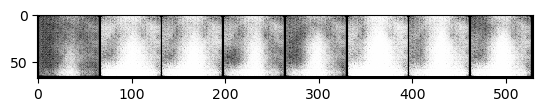

Epoch: 6	Batch: 52/53
Loss G: 0.7730849981307983
Loss D: 1.3727045059204102
Epoch: 7/100
Example images:


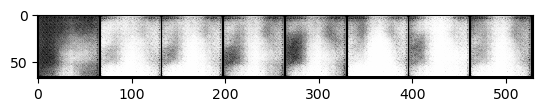

Epoch: 7	Batch: 52/53
Loss G: 1.3451095819473267
Loss D: 1.0121228694915771
Epoch: 8/100
Example images:


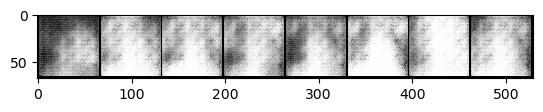

Epoch: 8	Batch: 52/53
Loss G: 2.2721004486083984
Loss D: 0.6936173439025879
Epoch: 9/100
Example images:


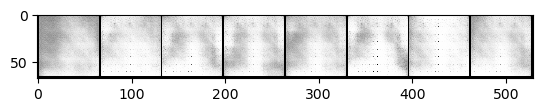

Epoch: 9	Batch: 52/53
Loss G: 2.6670408248901367
Loss D: 1.0538488626480103
Epoch: 10/100
Example images:


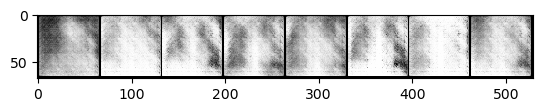

Epoch: 10	Batch: 52/53
Loss G: 0.9694606065750122
Loss D: 0.8681155443191528
Epoch: 11/100
Example images:


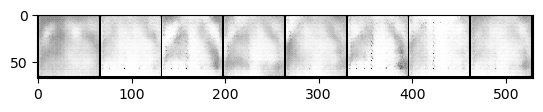

Epoch: 11	Batch: 52/53
Loss G: 1.6377907991409302
Loss D: 0.9824333786964417
Epoch: 12/100
Example images:


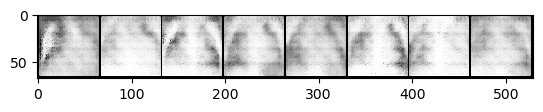

Epoch: 12	Batch: 52/53
Loss G: 2.1221694946289062
Loss D: 0.3867740035057068
Epoch: 13/100
Example images:


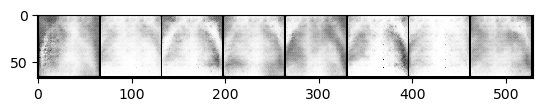

Epoch: 13	Batch: 52/53
Loss G: 2.4710586071014404
Loss D: 0.608834981918335
Epoch: 14/100
Example images:


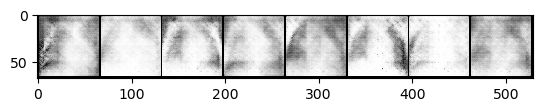

Epoch: 14	Batch: 52/53
Loss G: 3.748276710510254
Loss D: 0.689271867275238
Epoch: 15/100
Example images:


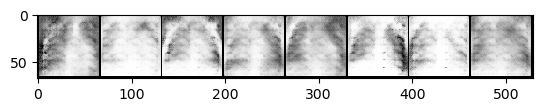

Epoch: 15	Batch: 52/53
Loss G: 2.44775390625
Loss D: 0.6555267572402954
Epoch: 16/100
Example images:


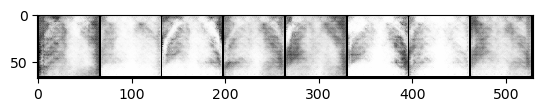

Epoch: 16	Batch: 52/53
Loss G: 1.6267517805099487
Loss D: 0.7687263488769531
Epoch: 17/100
Example images:


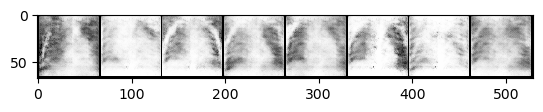

Epoch: 17	Batch: 52/53
Loss G: 2.1556291580200195
Loss D: 0.640150785446167
Epoch: 18/100
Example images:


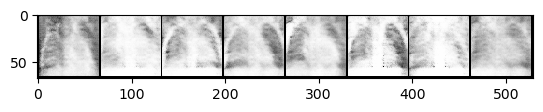

Epoch: 18	Batch: 52/53
Loss G: 1.420339822769165
Loss D: 1.1118382215499878
Epoch: 19/100
Example images:


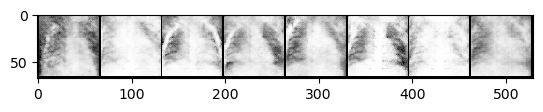

Epoch: 19	Batch: 52/53
Loss G: 2.211735486984253
Loss D: 0.7301403284072876
Epoch: 20/100
Example images:


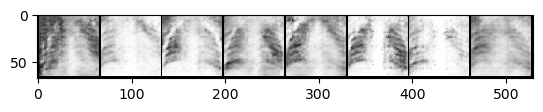

Epoch: 20	Batch: 52/53
Loss G: 1.7930872440338135
Loss D: 0.8438798785209656
Epoch: 21/100
Example images:


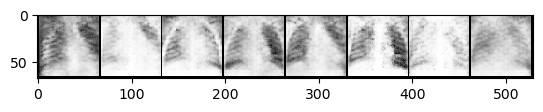

Epoch: 21	Batch: 52/53
Loss G: 2.7207624912261963
Loss D: 0.647464394569397
Epoch: 22/100
Example images:


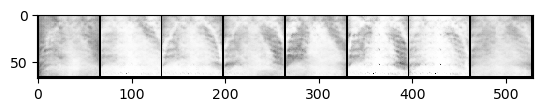

Epoch: 22	Batch: 52/53
Loss G: 3.2182154655456543
Loss D: 0.8002125024795532
Epoch: 23/100
Example images:


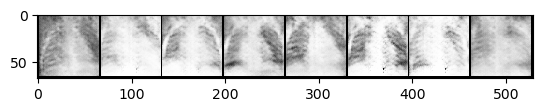

Epoch: 23	Batch: 52/53
Loss G: 3.1540822982788086
Loss D: 0.5490049719810486
Epoch: 24/100
Example images:


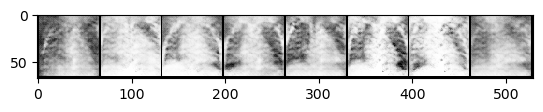

Epoch: 24	Batch: 52/53
Loss G: 3.1294305324554443
Loss D: 0.7211563587188721
Epoch: 25/100
Example images:


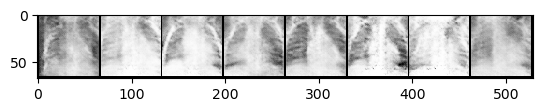

Epoch: 25	Batch: 52/53
Loss G: 2.1921181678771973
Loss D: 0.7922866940498352
Epoch: 26/100
Example images:


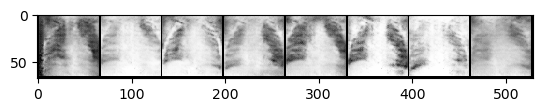

Epoch: 26	Batch: 52/53
Loss G: 3.7623720169067383
Loss D: 0.7560766935348511
Epoch: 27/100
Example images:


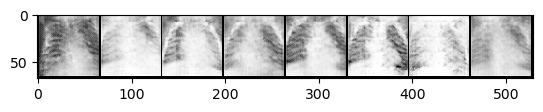

Epoch: 27	Batch: 52/53
Loss G: 2.328547477722168
Loss D: 0.8030082583427429
Epoch: 28/100
Example images:


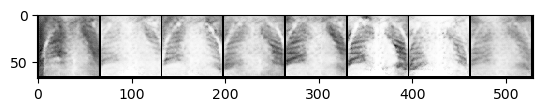

Epoch: 28	Batch: 52/53
Loss G: 3.7105865478515625
Loss D: 0.5903371572494507
Epoch: 29/100
Example images:


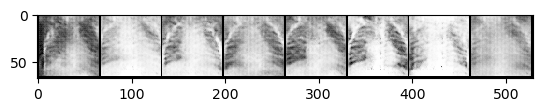

Epoch: 29	Batch: 52/53
Loss G: 2.696352481842041
Loss D: 0.6131706237792969
Epoch: 30/100
Example images:


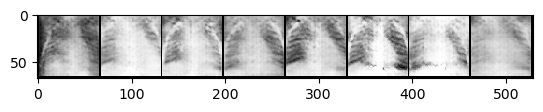

Epoch: 30	Batch: 52/53
Loss G: 3.127976417541504
Loss D: 0.6091017127037048
Epoch: 31/100
Example images:


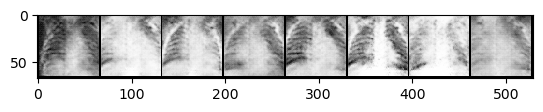

Epoch: 31	Batch: 52/53
Loss G: 2.2224931716918945
Loss D: 1.9503670930862427
Epoch: 32/100
Example images:


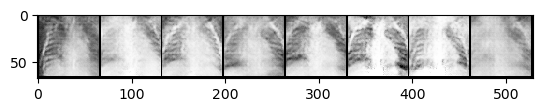

Epoch: 32	Batch: 52/53
Loss G: 4.052061080932617
Loss D: 0.2598447799682617
Epoch: 33/100
Example images:


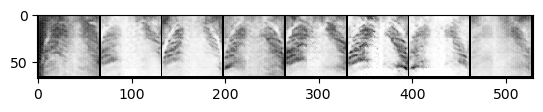

Epoch: 33	Batch: 52/53
Loss G: 2.6115901470184326
Loss D: 0.6080199480056763
Epoch: 34/100
Example images:


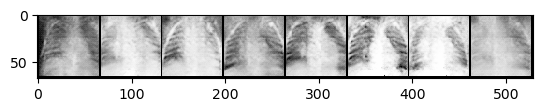

Epoch: 34	Batch: 52/53
Loss G: 3.5779049396514893
Loss D: 0.49371933937072754
Epoch: 35/100
Example images:


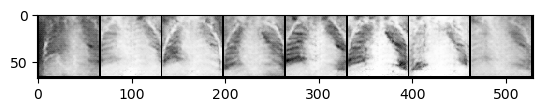

Epoch: 35	Batch: 52/53
Loss G: 3.9369566440582275
Loss D: 0.2035045325756073
Epoch: 36/100
Example images:


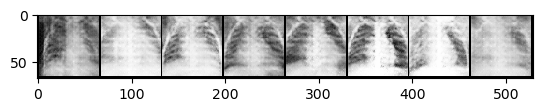

Epoch: 36	Batch: 52/53
Loss G: 4.025218963623047
Loss D: 0.41975459456443787
Epoch: 37/100
Example images:


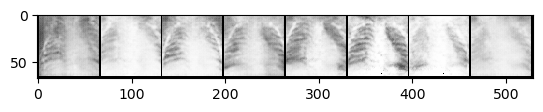

Epoch: 37	Batch: 52/53
Loss G: 3.411734104156494
Loss D: 0.4384511113166809
Epoch: 38/100
Example images:


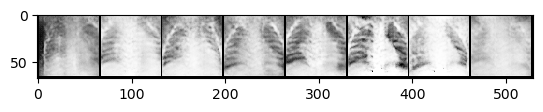

Epoch: 38	Batch: 52/53
Loss G: 3.291597843170166
Loss D: 0.4179542660713196
Epoch: 39/100
Example images:


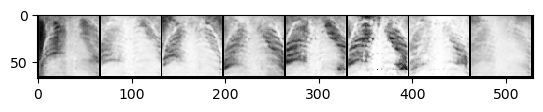

Epoch: 39	Batch: 52/53
Loss G: 2.640501022338867
Loss D: 0.4724879860877991
Epoch: 40/100
Example images:


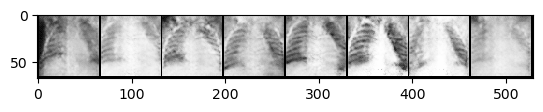

Epoch: 40	Batch: 52/53
Loss G: 3.0326666831970215
Loss D: 0.35583457350730896
Epoch: 41/100
Example images:


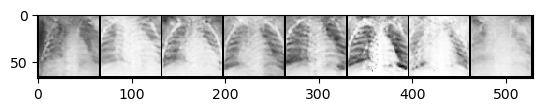

Epoch: 41	Batch: 52/53
Loss G: 3.8236749172210693
Loss D: 0.41254907846450806
Epoch: 42/100
Example images:


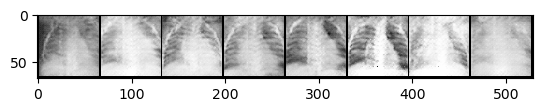

Epoch: 42	Batch: 52/53
Loss G: 3.8752946853637695
Loss D: 0.34500038623809814
Epoch: 43/100
Example images:


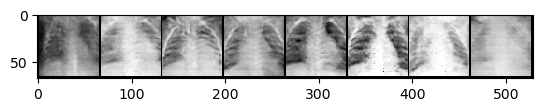

Epoch: 43	Batch: 52/53
Loss G: 2.2427024841308594
Loss D: 0.5002978444099426
Epoch: 44/100
Example images:


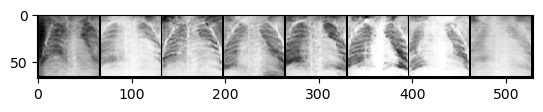

Epoch: 44	Batch: 52/53
Loss G: 3.593317985534668
Loss D: 0.5664191842079163
Epoch: 45/100
Example images:


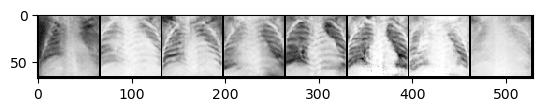

Epoch: 45	Batch: 52/53
Loss G: 4.239736080169678
Loss D: 0.730241596698761
Epoch: 46/100
Example images:


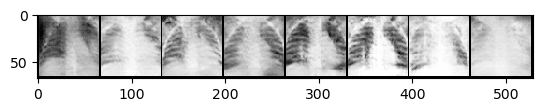

Epoch: 46	Batch: 52/53
Loss G: 4.311680316925049
Loss D: 0.28723224997520447
Epoch: 47/100
Example images:


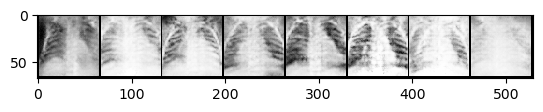

Epoch: 47	Batch: 52/53
Loss G: 4.366428852081299
Loss D: 0.3351532518863678
Epoch: 48/100
Example images:


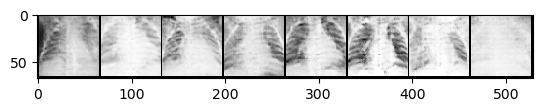

Epoch: 48	Batch: 52/53
Loss G: 3.9667248725891113
Loss D: 0.2409384548664093
Epoch: 49/100
Example images:


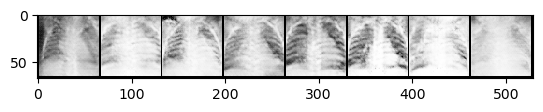

Epoch: 49	Batch: 52/53
Loss G: 4.118225574493408
Loss D: 0.19946745038032532
Epoch: 50/100
Example images:


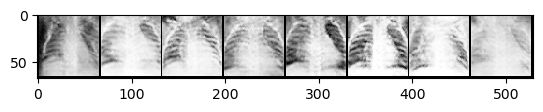

Epoch: 50	Batch: 52/53
Loss G: 3.887813091278076
Loss D: 0.26232022047042847
Epoch: 51/100
Example images:


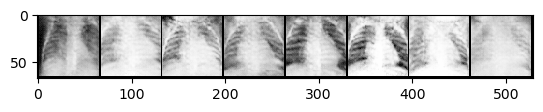

Epoch: 51	Batch: 52/53
Loss G: 4.033968925476074
Loss D: 0.24620206654071808
Epoch: 52/100
Example images:


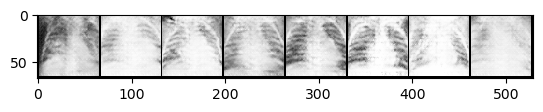

Epoch: 52	Batch: 52/53
Loss G: 4.600149631500244
Loss D: 0.1691543608903885
Epoch: 53/100
Example images:


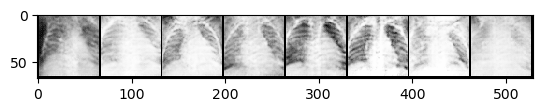

Epoch: 53	Batch: 52/53
Loss G: 4.1882476806640625
Loss D: 0.32825905084609985
Epoch: 54/100
Example images:


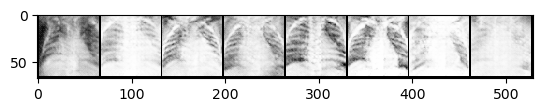

Epoch: 54	Batch: 52/53
Loss G: 3.864063262939453
Loss D: 0.35492241382598877
Epoch: 55/100
Example images:


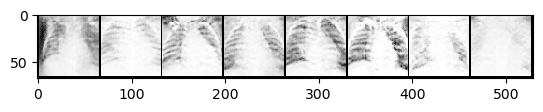

Epoch: 55	Batch: 52/53
Loss G: 3.06608510017395
Loss D: 0.3735901117324829
Epoch: 56/100
Example images:


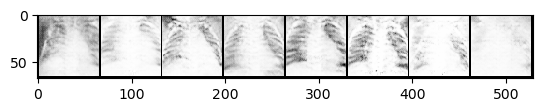

Epoch: 56	Batch: 52/53
Loss G: 4.305554389953613
Loss D: 0.29231905937194824
Epoch: 57/100
Example images:


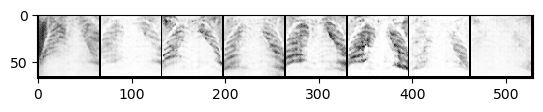

Epoch: 57	Batch: 52/53
Loss G: 3.7413406372070312
Loss D: 0.2416883409023285
Epoch: 58/100
Example images:


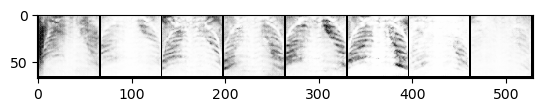

Epoch: 58	Batch: 52/53
Loss G: 3.762913227081299
Loss D: 0.22759684920310974
Epoch: 59/100
Example images:


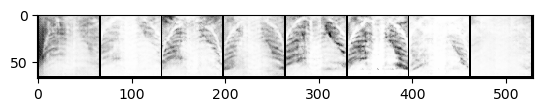

Epoch: 59	Batch: 52/53
Loss G: 3.1237454414367676
Loss D: 0.4242275357246399
Epoch: 60/100
Example images:


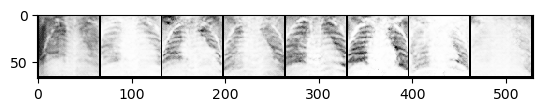

Epoch: 60	Batch: 52/53
Loss G: 3.4915459156036377
Loss D: 0.15039849281311035
Epoch: 61/100
Example images:


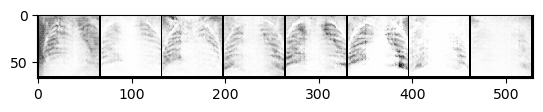

Epoch: 61	Batch: 52/53
Loss G: 4.710932731628418
Loss D: 0.5189483165740967
Epoch: 62/100
Example images:


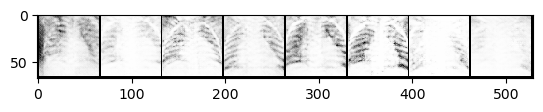

Epoch: 62	Batch: 52/53
Loss G: 6.103144645690918
Loss D: 0.2548169493675232
Epoch: 63/100
Example images:


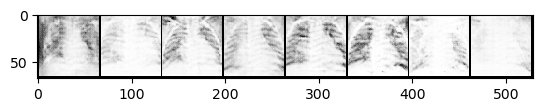

Epoch: 63	Batch: 52/53
Loss G: 5.594447135925293
Loss D: 0.5219212174415588
Epoch: 64/100
Example images:


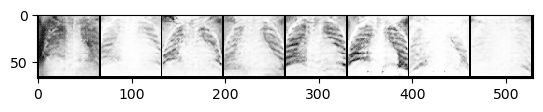

Epoch: 64	Batch: 52/53
Loss G: 5.282452583312988
Loss D: 0.2822876572608948
Epoch: 65/100
Example images:


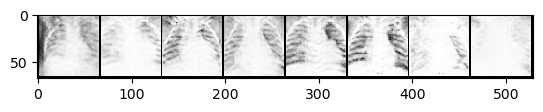

Epoch: 65	Batch: 52/53
Loss G: 5.764738082885742
Loss D: 0.47539690136909485
Epoch: 66/100
Example images:


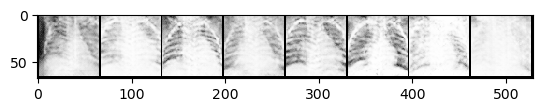

Epoch: 66	Batch: 52/53
Loss G: 3.7016830444335938
Loss D: 0.0653756856918335
Epoch: 67/100
Example images:


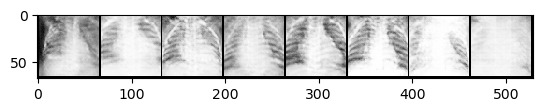

Epoch: 67	Batch: 52/53
Loss G: 4.731040954589844
Loss D: 0.18769946694374084
Epoch: 68/100
Example images:


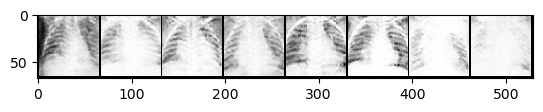

Epoch: 68	Batch: 52/53
Loss G: 7.18743896484375
Loss D: 0.12688232958316803
Epoch: 69/100
Example images:


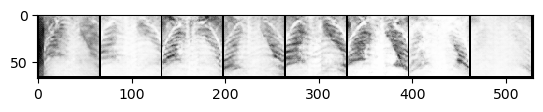

Epoch: 69	Batch: 52/53
Loss G: 4.105110168457031
Loss D: 0.2106824517250061
Epoch: 70/100
Example images:


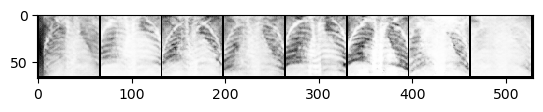

Epoch: 70	Batch: 52/53
Loss G: 4.613333225250244
Loss D: 0.10544883459806442
Epoch: 71/100
Example images:


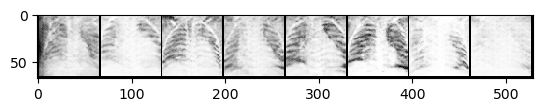

Epoch: 71	Batch: 52/53
Loss G: 6.394700050354004
Loss D: 0.10040423274040222
Epoch: 72/100
Example images:


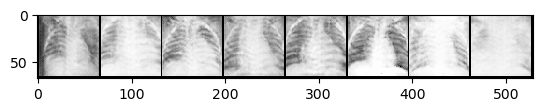

Epoch: 72	Batch: 52/53
Loss G: 4.447035312652588
Loss D: 0.11978475749492645
Epoch: 73/100
Example images:


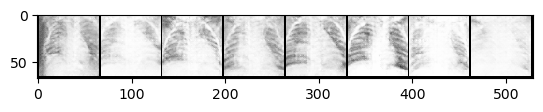

Epoch: 73	Batch: 52/53
Loss G: 4.520970821380615
Loss D: 0.1576298475265503
Epoch: 74/100
Example images:


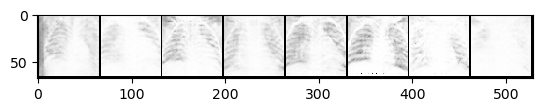

Epoch: 74	Batch: 52/53
Loss G: 5.050568103790283
Loss D: 0.16726142168045044
Epoch: 75/100
Example images:


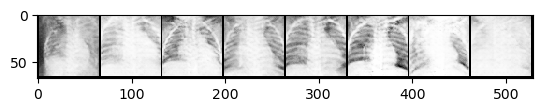

Epoch: 75	Batch: 52/53
Loss G: 7.8058366775512695
Loss D: 0.24270258843898773
Epoch: 76/100
Example images:


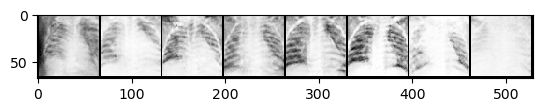

Epoch: 76	Batch: 52/53
Loss G: 4.9977312088012695
Loss D: 0.12522505223751068
Epoch: 77/100
Example images:


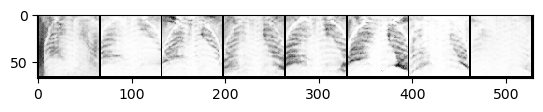

Epoch: 77	Batch: 52/53
Loss G: 5.8036394119262695
Loss D: 0.20365867018699646
Epoch: 78/100
Example images:


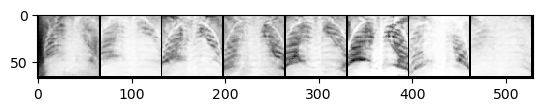

Epoch: 78	Batch: 52/53
Loss G: 6.7632060050964355
Loss D: 0.24522915482521057
Epoch: 79/100
Example images:


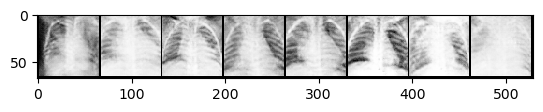

Epoch: 79	Batch: 52/53
Loss G: 6.298283576965332
Loss D: 0.3924373984336853
Epoch: 80/100
Example images:


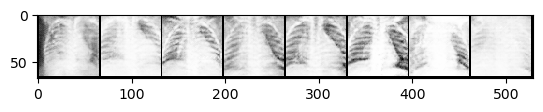

Epoch: 80	Batch: 52/53
Loss G: 5.20046329498291
Loss D: 0.08513862639665604
Epoch: 81/100
Example images:


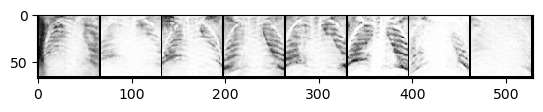

Epoch: 81	Batch: 52/53
Loss G: 6.6598310470581055
Loss D: 0.18411386013031006
Epoch: 82/100
Example images:


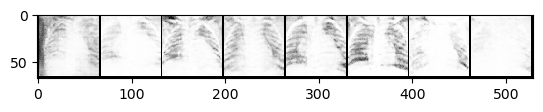

Epoch: 82	Batch: 52/53
Loss G: 5.934203147888184
Loss D: 0.05541115626692772
Epoch: 83/100
Example images:


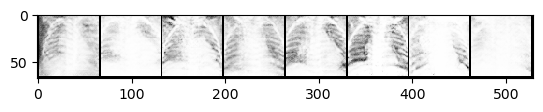

Epoch: 83	Batch: 52/53
Loss G: 4.454102516174316
Loss D: 0.15003074705600739
Epoch: 84/100
Example images:


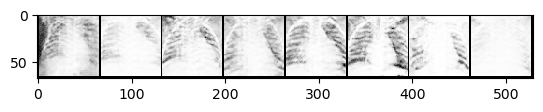

Epoch: 84	Batch: 52/53
Loss G: 4.635785102844238
Loss D: 0.07701355218887329
Epoch: 85/100
Example images:


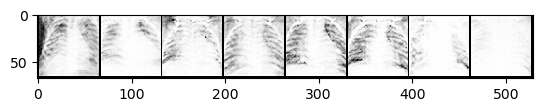

Epoch: 85	Batch: 52/53
Loss G: 6.976670265197754
Loss D: 0.09017783403396606
Epoch: 86/100
Example images:


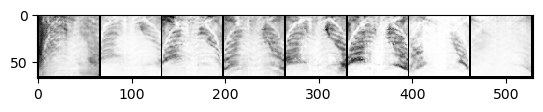

Epoch: 86	Batch: 52/53
Loss G: 5.729912757873535
Loss D: 0.07373993843793869
Epoch: 87/100
Example images:


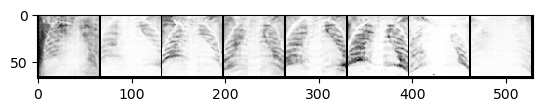

Epoch: 87	Batch: 52/53
Loss G: 6.23055362701416
Loss D: 0.019082557410001755
Epoch: 88/100
Example images:


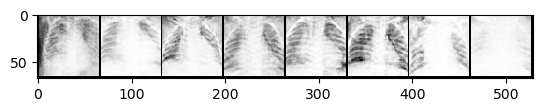

Epoch: 88	Batch: 52/53
Loss G: 4.894323348999023
Loss D: 0.06841440498828888
Epoch: 89/100
Example images:


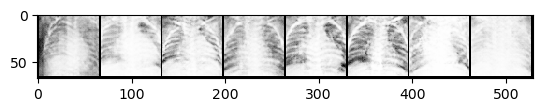

Epoch: 89	Batch: 52/53
Loss G: 4.012736797332764
Loss D: 0.09144918620586395
Epoch: 90/100
Example images:


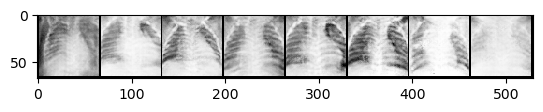

Epoch: 90	Batch: 52/53
Loss G: 6.614494323730469
Loss D: 0.32616952061653137
Epoch: 91/100
Example images:


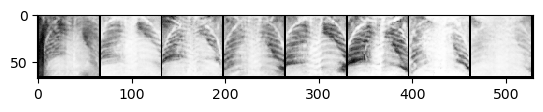

Epoch: 91	Batch: 52/53
Loss G: 4.594719886779785
Loss D: 0.14324040710926056
Epoch: 92/100
Example images:


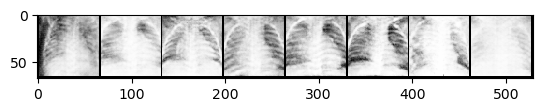

Epoch: 92	Batch: 52/53
Loss G: 5.044785022735596
Loss D: 0.04136362671852112
Epoch: 93/100
Example images:


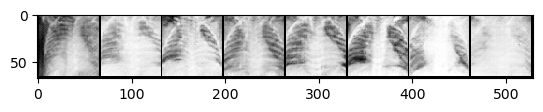

Epoch: 93	Batch: 52/53
Loss G: 6.666316986083984
Loss D: 0.0700182169675827
Epoch: 94/100
Example images:


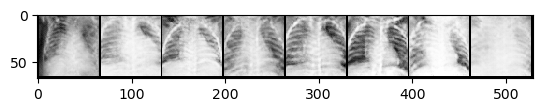

Epoch: 94	Batch: 52/53
Loss G: 3.7616500854492188
Loss D: 0.1286245584487915
Epoch: 95/100
Example images:


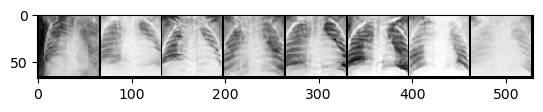

Epoch: 95	Batch: 52/53
Loss G: 4.382776737213135
Loss D: 0.1643654853105545
Epoch: 96/100
Example images:


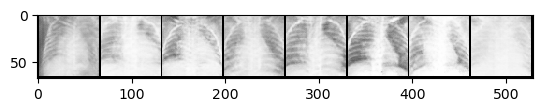

Epoch: 96	Batch: 52/53
Loss G: 5.287666320800781
Loss D: 0.28253641724586487
Epoch: 97/100
Example images:


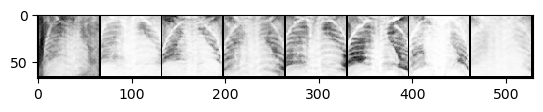

Epoch: 97	Batch: 52/53
Loss G: 4.714926242828369
Loss D: 0.20789474248886108
Epoch: 98/100
Example images:


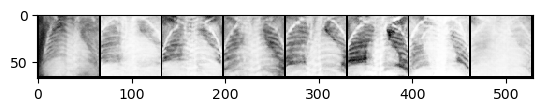

Epoch: 98	Batch: 52/53
Loss G: 5.871733665466309
Loss D: 0.17849470674991608
Epoch: 99/100
Example images:


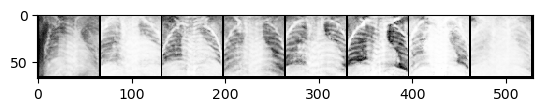

Epoch: 99	Batch: 52/53
Loss G: 5.434809684753418
Loss D: 0.13166359066963196


In [19]:
for epoch in range(n_epochs):
    print(f"Epoch: {epoch}/{n_epochs}")
    print("Example images:")
    generated_images = G(test_noise).detach().cpu()
    show_images(generated_images)
    
    for i, (batch, _) in enumerate(data_loader):
        print(f"\rEpoch: {epoch}\tBatch: {i}/{len(data_loader)}", end='')
        D.zero_grad()

        # Compute error on real data
        real = Variable(batch).to(device=device)
        real_labels = Variable(torch.ones(real.size(0), 1, 1, 1)).to(device=device)
        real_predictions = D(real)
        d_error_real = compute_loss(real_predictions, real_labels)
        
        # Compute error on fake data
        noise = Variable(torch.randn(real.size(0), 100, 1, 1)).to(device=device)
        fake = G(noise)
        fake_predictions = D(fake.detach())
        fake_labels = Variable(torch.zeros(real.size(0), 1, 1, 1)).to(device=device)
        d_error_fake = compute_loss(fake_predictions, fake_labels)
        
        # Accumulate and backpropogate on combined error
        d_error_total = d_error_real + d_error_fake
        d_error_total.backward()
        optimizer_d.step()
        
        ## Train the generator
        G.zero_grad()
        
        # Compute rate of fakes being detected
        goal_labels = Variable(torch.ones(real.size(0), 1, 1, 1)).to(device=device)
        results = D(fake)
        g_error = compute_loss(results, goal_labels)
        
        # Backpropogate and update weights
        g_error.backward()
        optimizer_g.step()
    
    print("")
    print(f"Loss G: {g_error}")
    print(f"Loss D: {d_error_total}")

In [20]:
torch.save(G.state_dict(), "trained_generator_first")
torch.save(D.state_dict(), "trained_discriminator_first")